In [1]:
import warnings 
from tensorflow.keras.utils import pad_sequences 
from tensorflow.keras.preprocessing.text import Tokenizer 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import numpy as np 

import re 
import nltk 
nltk.download('all') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
lemm = WordNetLemmatizer() 

warnings.filterwarnings("ignore") 


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\av

In [9]:
data = pd.read_csv("ClothingReview.csv") 
data.head(7) 
print(data.shape) 
  
# clean the data 
data = data[data['Class Name'].isnull() == False] 

(23486, 10)


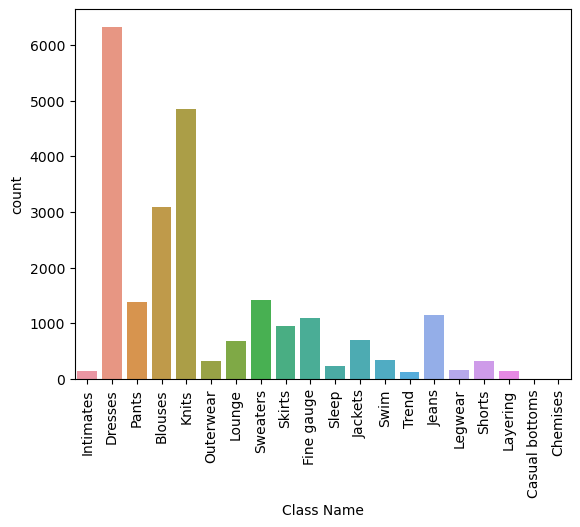

In [10]:
# count plot we automatically plot 
# the unique count of the feature selected 
  
sns.countplot(data=data, x='Class Name') 
plt.xticks(rotation=90) 
plt.show() 

In [12]:
def filter_score(rating): 
    return int(rating > 3) 
  
features = ['Class Name', 'Title', 'Review Text'] 
  
X = data[features] 
y = data['Rating'] 
y = y.apply(filter_score) 

In [13]:
def toLower(data): 
    if isinstance(data, float): 
        return '<UNK>'
    else: 
        return data.lower() 
  
stop_words = stopwords.words("english") 
  
def remove_stopwords(text): 
    no_stop = [] 
    for word in text.split(' '): 
        if word not in stop_words: 
            no_stop.append(word) 
    return " ".join(no_stop) 
  
def remove_punctuation_func(text): 
    return re.sub(r'[^a-zA-Z0-9]', ' ', text) 
  
# convert into lower case 
X['Title'] = X['Title'].apply(toLower) 
X['Review Text'] = X['Review Text'].apply(toLower) 
# remove common words 
X['Title'] = X['Title'].apply(remove_stopwords) 
X['Review Text'] = X['Review Text'].apply(remove_stopwords) 
# lemmatization 
X['Title'] = X['Title'].apply(lambda x: lemm.lemmatize(x)) 
X['Review Text'] = X['Review Text'].apply(lambda x: lemm.lemmatize(x)) 
# remove punctuation 
X['Title'] = X['Title'].apply(remove_punctuation_func) 
X['Review Text'] = X['Review Text'].apply(remove_punctuation_func) 
  
X['Text'] = list(X['Title']+X['Review Text']+X['Class Name']) 
  
# split into training and testing 
X_train, X_test, y_train, y_test = train_test_split( 
    X['Text'], y, test_size=0.25, random_state=42) 

In [14]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>') 
tokenizer.fit_on_texts(X_train) 

In [15]:
train_seq = tokenizer.texts_to_sequences(X_train) 
test_seq = tokenizer.texts_to_sequences(X_test) 
  
train_pad = pad_sequences(train_seq, 
                          maxlen=40, 
                          truncating="post", 
                          padding="post") 
test_pad = pad_sequences(test_seq, 
                         maxlen=40, 
                         truncating="post", 
                         padding="post") 

In [16]:
model = keras.models.Sequential() 
model.add(keras.layers.Embedding(10000, 128)) 
model.add(keras.layers.SimpleRNN(64, return_sequences=True)) 
model.add(keras.layers.SimpleRNN(64)) 
model.add(keras.layers.Dense(128, activation="relu")) 
model.add(keras.layers.Dropout(0.4)) 
model.add(keras.layers.Dense(1, activation="sigmoid")) 
  
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile("rmsprop", 
              "binary_crossentropy", 
              metrics=["accuracy"]) 
history = model.fit(train_pad, y_train, epochs=5, validation_data=(test_pad, y_test))


Epoch 1/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9289 - loss: 0.1959 - val_accuracy: 0.8517 - val_loss: 0.3842
Epoch 2/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9452 - loss: 0.1615 - val_accuracy: 0.8584 - val_loss: 0.5163
Epoch 3/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9582 - loss: 0.1232 - val_accuracy: 0.8621 - val_loss: 0.5542
Epoch 4/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9676 - loss: 0.1004 - val_accuracy: 0.7912 - val_loss: 0.6547
Epoch 5/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9734 - loss: 0.0825 - val_accuracy: 0.8219 - val_loss: 0.6915


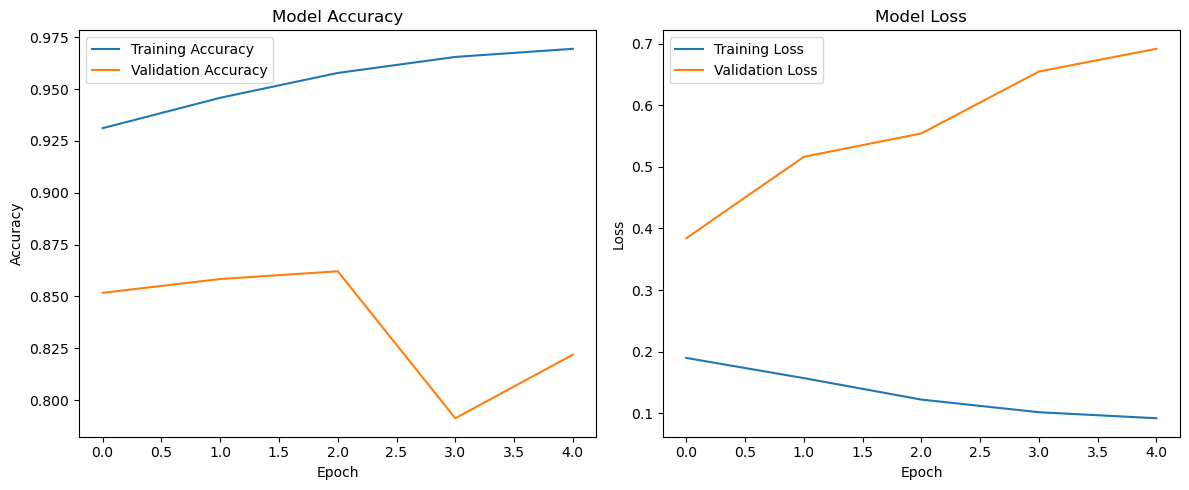

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
